38490 Records in total
UnPrompted Collection; 
 1 msec scan interval, 10hz output
TIMESTAMP  LI7700_Timestep  CR1000X_Timestep
count       38489.00000000    38489.00000000
mean           46.76530957       46.76621892
std            26.08696706       56.18751095
min            24.99968000        1.00000000
25%            24.99993600        1.00000000
50%            25.00019200        1.00000000
75%            75.00006400      116.00000000
max           149.99987200      150.00000000



C:\Users\User\AppData\Local\Temp\ipykernel_12356\3986474652.py:25: DtypeWarning: Columns (5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  CH4 = pd.read_csv(file,header=[0,1,2],skiprows=1,index_col=[0],na_values='-99999')


38648 Records in total
UnPrompted Collection; 
 1 msec scan interval, 40hz output
TIMESTAMP  LI7700_Timestep  CR1000X_Timestep
count       38645.00000000    38647.00000000
mean           46.57135464       46.57264471
std            25.94390486       55.63870061
min             0.00000000        1.00000000
25%            24.99993600        1.00000000
50%            25.00019200        1.00000000
75%            75.00006400      115.00000000
max           125.00019200      152.00000000

18000 Records in total
Polled Collection; 
 100 msec scan interval, ("0" Hz output)
TIMESTAMP  LI7700_Timestep  CR1000X_Timestep
count        6311.00000000    17999.00000000
mean          145.72169318      100.00000000
std            49.87614513        0.00000000
min            75.00006400      100.00000000
25%           100.00000000      100.00000000
50%           100.00025600      100.00000000
75%           199.99974400      100.00000000
max           200.00000000      100.00000000



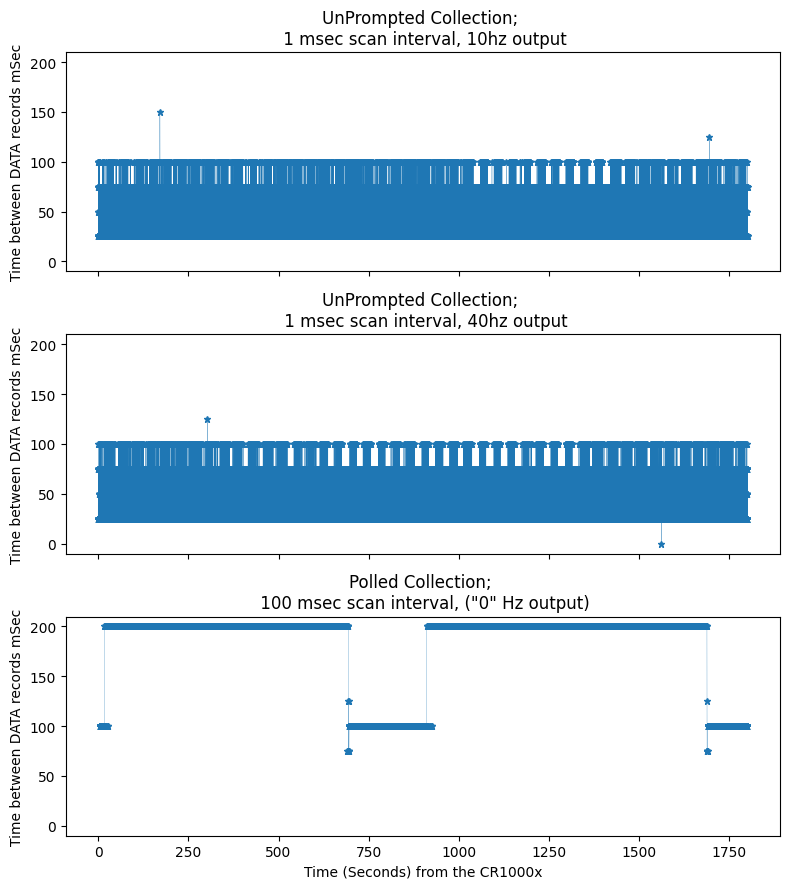

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


runs = {
    # 'UnPrompted Collection; \n 10 msec scan interval, 10hz output':'C:\\Campbellsci\\LoggerNet\\MDS1_U_data_10msec.dat',
    # 'UnPrompted Collection; \n 10 msec scan interval, 5hz output':'C:\\Campbellsci\\LoggerNet\\MDS1_U_data_10msec_5Hz.dat',
    # 'UnPrompted Collection; \n 10 msec scan interval, 10hz output':'C:\\Campbellsci\\LoggerNet\\MDS1_U_data_10msec_O.dat',
    'UnPrompted Collection; \n 1 msec scan interval, 10hz output':'C:\\Campbellsci\\LoggerNet\\MDS1_Uc_data_1msec.dat',
    'UnPrompted Collection; \n 1 msec scan interval, 40hz output':'C:\\Campbellsci\\LoggerNet\\MDS1_U_data_1msec_40Hz.dat',
    # 'UnPrompted Collection w/ Check; \n 1 msec scan interval, 40hz output':'C:\\Campbellsci\\LoggerNet\\MDS1_Uc_data_1msec.dat',
    'Polled Collection; \n 100 msec scan interval, ("0" Hz output)':'C:\\Campbellsci\\LoggerNet\\MDS1_P_data_10Hz.dat',
    # 'Polled Collection; \n 50 msec scan interval, ("0" Hz output)':'C:\\Campbellsci\\LoggerNet\\MDS1_P_data_20Hz.dat',
    # 'Polled Collection; \n 25 msec scan interval, ("0" Hz output)':'C:\\Campbellsci\\LoggerNet\\MDS1_P_data_40Hz.dat',
    # 'Basic Test; \n 10 msec scan interval, 10hz output':'C:\\Campbellsci\\LoggerNet\\MDS1_NoStart.dat',
    }

fig,ax=plt.subplots(len(runs.keys()),figsize=(8,len(runs.keys())*3),sharey=True,sharex=True)
if len(runs.keys())==1:
    ax=[ax]

for i,(title,file) in enumerate(runs.items()):

    CH4 = pd.read_csv(file,header=[0,1,2],skiprows=1,index_col=[0],na_values='-99999')
    CH4.columns=CH4.columns.get_level_values(0)
    CH4 = CH4.loc[CH4.index>=CH4.index[10]]
    CH4.index = pd.DatetimeIndex(pd.to_datetime(CH4.index,format='ISO8601'))
    CH4['CR1000X_Time'] = CH4.index
    CH4['LI7700_Time'] = pd.to_datetime(CH4['seconds']+CH4['nanoseconds']*1e-9,unit='s')


    CH4.index = (CH4.index-CH4.index[0])/np.timedelta64(1, 's')
    CH4 = CH4.loc[CH4.index<1800].copy()
    print(f'{CH4.shape[0]} Records in total')
    
    CH4['LI7700_Timestep'] = CH4['LI7700_Time'].diff().dt.total_seconds()*1e3
    CH4['CR1000X_Timestep'] = CH4['CR1000X_Time'].diff().dt.total_seconds()*1e3

    ax[i].plot(CH4['LI7700_Timestep'],marker='*',linewidth=0.2,markersize=5)
    ax[i].set_title(title)
    ax[i].set_ylabel('Time between DATA records mSec')

    print(title)
    print(CH4[['LI7700_Timestep','CR1000X_Timestep']].describe())
    # print(CH4['temp'].describe())
    # print(f'Min time difference between records {CH4["LI7700_Timestep"].diff().dt.total_seconds().min()*1e3}')
    # print(f'Mean time difference between records {CH4["LI7700_Timestep"].diff().dt.total_seconds().mean()*1e3}')
    # print(f'Max time difference between records {CH4["LI7700_Timestep"].diff().dt.total_seconds().max()*1e3}')
    print()

ax[-1].set_xlabel('Time (Seconds) from the CR1000x')
# ax[-1].set_xlim(0,500)
# ax[-1].set_xlim(135,150)
# ax[-1].set_ylim(0,500)

plt.tight_layout()


In [66]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# CH4[['LI7700_Timestep','CR1000X_Timestep']]
CH4 = pd.read_csv('C:\\Campbellsci\\LoggerNet\\MDS1_CH4_Polled_SubRout.dat',header=[0,1,2],skiprows=1,index_col=[0])
CH4.index = pd.DatetimeIndex(pd.to_datetime(CH4.index,format='ISO8601'))
CH4.columns = CH4.columns.get_level_values(0)
first = CH4.loc[CH4['tcpip_socket_status']>=0,'RECORD'].min()
CH4 = CH4.loc[CH4['RECORD']>=first].copy()
CH4[['seconds','nanoseconds']] = CH4[['seconds','nanoseconds']].replace({-2147483648:np.nan})
print(CH4.columns)


CH4['LI7700_Time'] = pd.to_datetime(CH4['seconds']+CH4['nanoseconds']*1e-9,unit='s')

# CH4['Day'] = CH4['DOM']
# CH4['rtime'] = pd.to_datetime(CH4[['Year', 'Month', 'Day', 'Hour',
#        'Minute', 'Second']])
# CH4['rtime'] = CH4['rtime'] + pd.to_timedelta(CH4['uSecond'],unit='us')
# print(((CH4['rtime']-CH4.index)/np.timedelta64(1, 's')).describe())

# CH4.loc[CH4['fastCount']<CH4['fastCount'].max(),'fastCount']+=1

CH4['loggerStep'] = CH4.index
CH4['loggerStep'] = CH4['loggerStep'].diff()/np.timedelta64(1, 's')
CH4['7700Step'] = (CH4['LI7700_Time'].diff()/np.timedelta64(1, 's'))
print(CH4[['loggerStep','7700Step']].describe())

# CH4[['ProcID','seconds']].groupby('ProcID').count().plot()
# print(CH4.loc[CH4[['seconds','nanoseconds','ProcID']].duplicated(keep=False)][:5])
# CH4.head()


CH4[['ProcID','sub_Timer','scan_Timer']].describe()


C:\Users\User\AppData\Local\Temp\ipykernel_24328\1449655153.py:5: DtypeWarning: Columns (9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  CH4 = pd.read_csv('C:\\Campbellsci\\LoggerNet\\MDS1_CH4_Polled_SubRout.dat',header=[0,1,2],skiprows=1,index_col=[0])


Index(['RECORD', 'tcpip_socket_status', 'ProcID', 'sub_Timer', 'scan_Timer',
       'i', 'seconds', 'nanoseconds', 'CH4_density', 'CH4_mole_fraction',
       'Temperature', 'Pressure', 'RSSI', 'Success_Count'],
      dtype='object', name='TIMESTAMP')
TIMESTAMP     loggerStep       7700Step
count      175557.000000  175545.000000
mean            0.027365       0.027477
std             0.047231       0.007470
min             0.000000       0.025000
25%             0.000000       0.025000
50%             0.000000       0.025000
75%             0.050000       0.025000
max             6.900000       0.050000


TIMESTAMP,ProcID,sub_Timer,scan_Timer
count,175558.000000,175558.000000,175558.000000
mean,48302.429214,47.014656,48.530941
std,27875.907954,3.962037,3.595341
min,196.000000,38.000000,39.000000
25%,24193.000000,44.000000,46.000000
50%,47962.500000,48.000000,50.000000
75%,72570.750000,51.000000,51.000000
max,96279.000000,52.000000,57.000000


In [68]:
# s = 1000
# CH4['i'][s:s+200].plot()
# CH4['Success_Count'].describe()
# CH4[s:s+25][['seconds','nanoseconds','i','Success_Count']]
r = CH4.loc[CH4['7700Step'] == CH4['7700Step'].max(),'RECORD'].values
CH4.loc[(CH4['RECORD']-r[2]).abs()<4]
# CH4.loc[CH4['ProcID'] == 6605]
# CH4['sub_Timer'].hist()
# CH4['SSDate']

TIMESTAMP,RECORD,tcpip_socket_status,ProcID,sub_Timer,scan_Timer,i,seconds,nanoseconds,CH4_density,CH4_mole_fraction,Temperature,Pressure,RSSI,Success_Count,LI7700_Time,loggerStep,7700Step
2024-06-24 20:09:11.750,739,248,536,39,40,1,1.719260e+09,425000000.0,0.0833051,2.02242,22.8497,100.847,68.0227,3,2024-06-24 20:08:44.424999936,0.05,0.025
2024-06-24 20:09:11.750,740,248,536,39,41,2,1.719260e+09,450000000.0,0.083084,2.01708,22.8522,100.849,68.0225,3,2024-06-24 20:08:44.450000128,0.00,0.025
2024-06-24 20:09:11.750,741,248,536,39,42,3,1.719260e+09,475000000.0,0.0831168,2.01776,22.8394,100.849,68.0171,3,2024-06-24 20:08:44.474999808,0.00,0.025
2024-06-24 20:09:11.850,742,248,538,51,51,1,1.719260e+09,525000000.0,0.0830415,2.01608,22.8559,100.845,68.0231,1,2024-06-24 20:08:44.525000192,0.10,0.050
2024-06-24 20:09:11.900,743,248,539,41,42,1,1.719260e+09,550000000.0,0.0829485,2.01365,22.8372,100.849,68.0246,3,2024-06-24 20:08:44.549999872,0.05,0.025
2024-06-24 20:09:11.900,744,248,539,41,43,2,1.719260e+09,575000000.0,0.0830712,2.01664,22.8384,100.847,68.0318,3,2024-06-24 20:08:44.575000064,0.00,0.025
2024-06-24 20:09:11.900,745,248,539,41,43,3,1.719260e+09,600000000.0,0.0831962,2.01971,22.8422,100.847,68.03,3,2024-06-24 20:08:44.600000000,0.00,0.025


In [114]:
CSAT_delay = 2
CSAT_dim = 5
for i in range(1,CSAT_delay+1):
    print((i)*CSAT_dim-CSAT_dim+1,(i)*CSAT_dim+1)
    # for j in range(1,CSAT_dim+1):
    #     print(i+(j*i-1),CSAT_dim*i+j)
        # print(i+CSAT_dim*(j-1),j*CSAT_dim+i)

1 6
6 11


In [25]:

# def count_digits(string):
#     return sum(item.isdigit() for item in str(string))
# # (CH4['seconds']+CH4['nanoseconds']*1e-9)[0:1]
# CH4['Posix'] = (CH4['seconds']+CH4['nanoseconds']*1e-9).astype('float32')
# CH4['Dig']=CH4['Posix'].apply(count_digits)
# pd.set_option('display.float_format', lambda x: '%.8f' % x)
# print(CH4[['Dig','Posix']])

R = CH4.loc[CH4['loggerStep']>.05,'RECORD']#.values[0]
print(R.diff())

# CH4.loc[(CH4['RECORD']-R).abs() < 5]#,'loggerStep']
CH4[['ProcID','loggerStep','7700Step','nanoseconds']][:25]

2024-06-24 18:22:21.850       NaN
2024-06-24 18:24:02.050    4005.0
2024-06-24 18:25:41.850    3991.0
2024-06-24 18:27:21.850    3999.0
2024-06-24 18:28:56.750    3791.0
2024-06-24 18:30:24.550    3503.0
Name: RECORD, dtype: float64


TIMESTAMP,ProcID,loggerStep,7700Step,nanoseconds
2024-06-24 18:20:44.200,185,NaN,NaN,375000000
2024-06-24 18:20:44.200,185,0.00,0.025,400000000
2024-06-24 18:20:44.200,185,0.00,0.025,425000000
2024-06-24 18:20:44.250,186,0.05,0.025,450000000
2024-06-24 18:20:44.250,186,0.00,0.025,475000000
2024-06-24 18:20:44.250,186,0.00,0.025,500000000
2024-06-24 18:20:44.300,187,0.05,0.025,525000000
2024-06-24 18:20:44.300,187,0.00,0.025,550000000
2024-06-24 18:20:44.350,188,0.05,0.025,575000000
2024-06-24 18:20:44.350,188,0.00,0.025,600000000


In [48]:

Flux = pd.read_csv('C:\\Campbellsci\\LoggerNet\\MDS1_Flux.dat',
                   header=[0,1,2],
                   skiprows=1,
                   index_col=[0])

# CH4 = pd.read_csv('C:\\Campbellsci\\LoggerNet\\MDS1_Unprompted.dat',header=[0,1,2],skiprows=1,index_col=[0])

Flux.index = pd.DatetimeIndex(pd.to_datetime(Flux.index,format='ISO8601'))
Flux.columns = Flux.columns.get_level_values(0)

# Flux = Flux.loc[Flux['Scount']>0].copy()

Flux['loggerStep'] = Flux.index
Flux['loggerStep'] = Flux['loggerStep'].diff()/np.timedelta64(1, 's')
print(Flux['loggerStep'].describe())

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Campbellsci\\LoggerNet\\MDS1_Flux.dat'

In [29]:
# Flux['loggerStep']
Flux.head(10)

TIMESTAMP,RECORD,sub_Timer,fastCount,Ux,Uy,Uz,Ts,CO2,H2O,press,Diagnostic_7500,loggerStep
2024-06-21 20:00:10.000,7324,112260,1000,-0.07650,0.08725,0.04300,24.91446,1011.906,9.077562,100.9630,249,NaN
2024-06-21 20:00:10.050,7325,93420,791,-0.07475,0.08550,0.04450,24.92477,1011.825,9.075933,100.9935,249,0.05
2024-06-21 20:00:10.100,7326,120,1,-0.07400,0.08600,0.04575,24.94714,1011.831,9.066201,100.9992,249,0.05
2024-06-21 20:00:10.150,7327,40302,374,-0.07275,0.08800,0.04775,24.95749,1011.272,9.066308,100.9992,249,0.05
2024-06-21 20:00:10.200,7328,110950,1000,-0.07125,0.09275,0.05025,24.97647,1010.899,9.065450,100.9630,249,0.05
2024-06-21 20:00:10.250,7329,92317,816,-0.06975,0.09775,0.05200,24.99026,1009.961,9.067362,100.9630,249,0.05
2024-06-21 20:00:10.300,7330,43215,383,-0.06800,0.10325,0.05450,25.01266,1009.447,9.062134,100.9833,249,0.05
2024-06-21 20:00:10.350,7331,107877,1000,-0.06700,0.10750,0.05725,25.03674,1008.793,9.066840,101.0094,249,0.05
2024-06-21 20:00:10.400,7332,96356,896,-0.06675,0.10950,0.05925,25.05225,1008.380,9.069532,100.9935,249,0.05
2024-06-21 20:00:10.450,7333,114,1,-0.06750,0.11025,0.06025,25.06601,1008.081,9.069818,100.9471,249,0.05


In [19]:
# CH4.index[:10]
# Flux.index[:10]
Comb = pd.concat([CH4,Flux],axis=1)
Comb[:20]
# for c in ['CO2','H2O']:
#     Comb.loc[Comb[c].astype('float')<0,c]=np.nan
#     Comb.loc[Comb[c].astype('float')>2000,c]=np.nan

TIMESTAMP,RECORD,Scount,seconds,nanoseconds,Diagnostic,CH4_density,CH4_mole_fraction,Temperature,Pressure,RSSI,...,Ux,Uy,Uz,Ts,sonic_diag,CO2,H2O,press,irga_diag,loggerStep
2024-06-20 20:39:52.030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NAN,NAN,NAN,NAN,61503,1053.727,10.87543,101.2440,249,NaN
2024-06-20 20:39:52.040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NAN,NAN,NAN,NAN,61503,1053.814,10.87396,101.2440,249,0.01
2024-06-20 20:39:52.050,1.0,385.0,1.718916e+09,775000000.0,14,0.0810557,1.96928,22.9904,100.606,68.2111,...,NAN,NAN,NAN,NAN,61503,1053.994,10.87108,101.2440,249,0.01
2024-06-20 20:39:52.060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NAN,NAN,NAN,NAN,61503,1054.076,10.86977,101.2440,249,0.01
2024-06-20 20:39:52.070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.186,-0.118,0.05175,24.94888,60,1054.189,10.86772,101.2440,249,0.01
2024-06-20 20:39:52.080,2.0,388.0,1.718916e+09,800000000.0,14,0.0812312,1.97361,22.9973,100.608,68.1844,...,NAN,NAN,NAN,NAN,61503,1054.205,10.86713,101.2440,249,0.01
2024-06-20 20:39:52.090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NAN,NAN,NAN,NAN,61503,1054.121,10.86719,101.2440,249,0.01
2024-06-20 20:39:52.100,3.0,390.0,1.718916e+09,825000000.0,14,0.0810257,1.96861,22.9957,100.604,68.1395,...,NAN,NAN,NAN,NAN,61503,1054.015,10.86801,101.2440,249,0.01
2024-06-20 20:39:52.110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NAN,NAN,NAN,NAN,61503,1053.690,10.87134,101.2440,249,0.01
2024-06-20 20:39:52.120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.19775,-0.105,0.049,24.96439,61,1053.494,10.87377,101.2440,249,0.01


<Axes: >

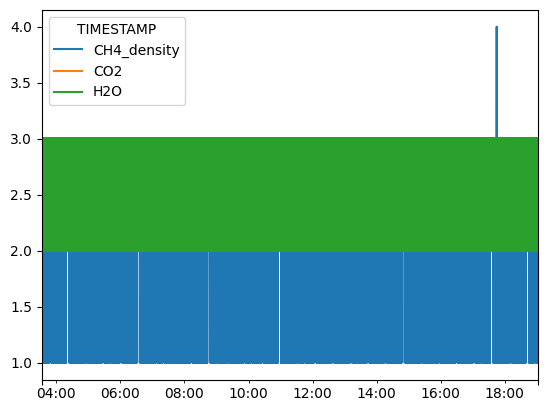

In [4]:
# np.timedelta64(1, 's')
i = 1000
# Test = Comb[['LI7700_Time','loggerStep','nanoseconds','CH4_density','CO2','H2O']].copy()#[i:i+25]
# Flux['CO2']
sub = ['CH4_density','CO2','H2O']
Test = Comb[sub].astype('float').resample('50L').agg(['count','mean'])

Test.xs('count', level=1, axis=1).plot()